In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:

df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
print(df_train.shape)
df_train.head()

(93686, 3)


,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train = df_train.drop('sub_category', axis=1)
df_train['target'] = label_encoder.fit_transform(df_train['category'])

category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
category_mapping

{'Any Other Cyber Crime': 0,
 'Child Pornography CPChild Sexual Abuse Material CSAM': 1,
 'Cryptocurrency Crime': 2,
 'Cyber Attack/ Dependent Crimes': 3,
 'Cyber Terrorism': 4,
 'Hacking  Damage to computercomputer system etc': 5,
 'Online Cyber Trafficking': 6,
 'Online Financial Fraud': 7,
 'Online Gambling  Betting': 8,
 'Online and Social Media Related Crime': 9,
 'Ransomware': 10,
 'RapeGang Rape RGRSexually Abusive Content': 11,
 'Report Unlawful Content': 12,
 'Sexually Explicit Act': 13,
 'Sexually Obscene material': 14}

In [ ]:
df_train.head()

,category,crimeaditionalinfo,target
0,Online and Social Media Related Crime,I had continue received random calls and abusi...,9
1,Online Financial Fraud,The above fraudster is continuously messaging ...,7
2,Online Gambling Betting,He is acting like a police and demanding for m...,8
3,Online and Social Media Related Crime,In apna Job I have applied for job interview f...,9
4,Online Financial Fraud,I received a call from lady stating that she w...,7


In [ ]:
#Missing values
df_train.dropna(subset=['crimeaditionalinfo'],inplace=True)
df_train.isna().sum()

,0
category,0
crimeaditionalinfo,0
target,0


In [ ]:
#1. WORD-COUNT
df_train['word_count'] = df_train['crimeaditionalinfo'].apply(lambda x: len(str(x).split()))
print(df_train[df_train['target']==1]['word_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==0]['word_count'].mean()) #Non-Disaster tweets
#Disaster tweets are more wordy than the non-disaster tweets
print("start")
#2. CHARACTER-COUNT
df_train['char_count'] = df_train['crimeaditionalinfo'].apply(lambda x: len(str(x)))
print(df_train[df_train['target']==0]['char_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==1]['char_count'].mean())
print(df_train[df_train['target']==2]['char_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==3]['char_count'].mean())
print(df_train[df_train['target']==4]['char_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==5]['char_count'].mean())
print(df_train[df_train['target']==6]['char_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==7]['char_count'].mean())
print(df_train[df_train['target']==8]['char_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==9]['char_count'].mean())
print(df_train[df_train['target']==10]['char_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==11]['char_count'].mean())
print(df_train[df_train['target']==12]['char_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==13]['char_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==14]['char_count'].mean()) #Non-Disaster tweets
#Disaster tweets are longer than the non-disaster tweets
print("end")
#3. UNIQUE WORD-COUNT
df_train['unique_word_count'] = df_train['crimeaditionalinfo'].apply(lambda x: len(set(str(x).split())))
print(df_train[df_train['target']==1]['unique_word_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==0]['unique_word_count'].mean()) #Non-Disaster tweets

64.3060686015831
81.47954399190954
start
444.83111151972054
361.8179419525066
545.8291666666667
804.7012195121952
472.6645962732919
431.2309941520468
374.39890710382514
313.727602062143
397.9436936936937
416.44653155379797
400.875
1306.5294117647059
510.0
393.2435567010309
394.55712731229596
end
45.25065963060686
55.096074285188934


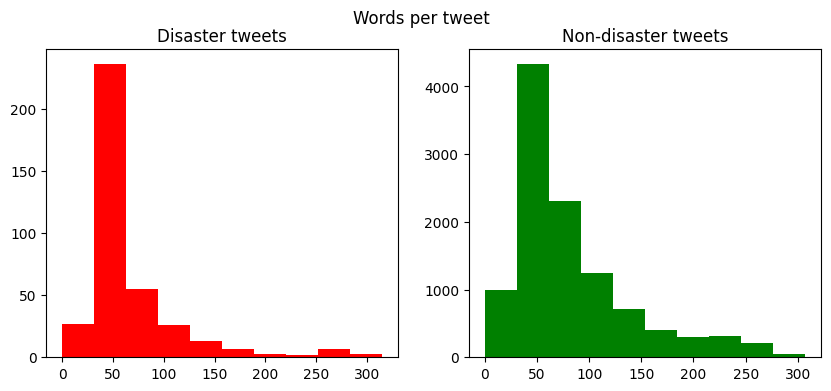

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_train[df_train['target']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Disaster tweets')
train_words=df_train[df_train['target']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()

In [ ]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace

    return text

text=preprocess(text)
print(text)  #text is a string


this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [ ]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')
nltk.download('punkt')  # for word_tokenize
nltk.download('averaged_perceptron_tagger')  # for pos_tag
nltk.download('wordnet')  # for lemmatizer

# Now you can proceed with your code
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#3. LEXICON-BASED TEXT PROCESSING EXAMPLES

#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

#2. STEMMING

# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

message cleaned may involve things like adjacent spaces tabs
messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab


In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df_train['clean_text'] = df_train['crimeaditionalinfo'].apply(lambda x: finalpreprocess(x))
df_train=df_train.drop(columns=['word_count','char_count','unique_word_count'])
df_train.head()

In [ ]:
import nltk
from gensim.models import Word2Vec
import pandas as pd

# Ensure that nltk resources are downloaded (for tokenization)
nltk.download('punkt')

# Handle missing values and convert all entries to strings
df_train['clean_text'] = df_train['clean_text'].fillna('')  # Replace NaN with empty string
df_train['clean_text_tok'] = [nltk.word_tokenize(str(i)) for i in df_train['clean_text']]  # Tokenize the text

# Create Word2Vec model using the tokenized sentences
model = Word2Vec(df_train['clean_text_tok'], min_count=1)  # min_count=1 means include words that appear at least once

# Get word vectors
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  # Mapping of words to their word vectors

# Example transformation: Convert a document into a vector by averaging word vectors
class Word2VecTransformer:
    def __init__(self, word2vec, dim):
        self.word2vec = word2vec
        self.dim = dim

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

# Initialize the transformer
word2vec_transformer = Word2VecTransformer(w2v, model.vector_size)

# Example usage of the transformer
X_transformed = word2vec_transformer.transform(df_train['clean_text_tok'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_train.head()

,category,crimeaditionalinfo,target,clean_text,clean_text_tok
0,Online and Social Media Related Crime,I had continue received random calls and abusi...,9.0,continue receive random call abusive message w...,"[continue, receive, random, call, abusive, mes..."
1,Online Financial Fraud,The above fraudster is continuously messaging ...,7.0,fraudster continuously message ask pay money s...,"[fraudster, continuously, message, ask, pay, m..."
2,Online Gambling Betting,He is acting like a police and demanding for m...,8.0,act like police demand money add section text ...,"[act, like, police, demand, money, add, sectio..."
3,Online and Social Media Related Crime,In apna Job I have applied for job interview f...,9.0,apna job apply job interview telecalling resou...,"[apna, job, apply, job, interview, telecalling..."
4,Online Financial Fraud,I received a call from lady stating that she w...,7.0,receive call lady state send new phone vivo re...,"[receive, call, lady, state, send, new, phone,..."


In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION

# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df_train["clean_text"],
                                                  df_train["target"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))



In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))


In [ ]:
import pandas as pd
import numpy as np

# Define a preprocessing function that handles NaN values
def finalpreprocess(text):
    if isinstance(text, str):  # check if the text is a valid string
        return preprocess(text)
    else:
        return ''  # or return 'Unknown' for NaN or invalid values

# Read your dataset
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

# Apply the preprocessing to the 'crimeaditionalinfo' column
df_test['clean_text'] = df_test['crimeaditionalinfo'].apply(lambda x: finalpreprocess(x))

# Convert X_test to vector representation
X_test = df_test['clean_text']
X_vector = tfidf_vectorizer.transform(X_test)

# Make predictions using the trained model
y_predict = lr_tfidf.predict(X_vector)  # Use the trained model
y_prob = lr_tfidf.predict_proba(X_vector)[:, 1]  # Predicted probabilities
reverse_mapping = {v: k for k, v in category_mapping.items()}
# Add the predicted values to the dataframe
df_test['predict_prob'] = y_prob
df_test['target'] = y_predict
df_test['category_name'] = df_test['target'].map(reverse_mapping)
# Display the results
print(df_test.head())

# Prepare the final output for submission
final = df_test[['crimeaditionalinfo','target','category_name']].reset_index(drop=True)
final.to_csv('final.csv', index=False)


In [ ]:
df_test.head()


,category,sub_category,crimeaditionalinfo,clean_text,predict_prob,target,category_name
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...,sir namaskar mein ranjit kumar patrapaise nehi...,0.001043,7,Online Financial Fraud
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT,kotak mahindra bank fraud fraud amount,0.000055,7,Online Financial Fraud
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...,the issue actually started when i got this ema...,0.007657,3,Cyber Attack/ Dependent Crimes
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...,i am amit kumar from karwi chitrakoot i am tot...,0.001058,7,Online Financial Fraud
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...,i have ordered saree and blouse from rinki sur...,0.003310,7,Online Financial Fraud
